In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Driver Acceptance Data

In [4]:
pay_df = pd.read_csv('datasets/driverAcceptanceData - driverAcceptanceData.csv', index_col=0)
pay_df['profit'] = 30.0 - pay_df['PAY']

## Plotting the distribution

First we plot the distribution of the accepted rides and rejected rides. Driver behaviour on accepting rides can be easily understood; the higher the compensation (offered pay), the greater the acceptance rate, and vice-versa on low compensation. The distribution of offered compensation follows a normal distribution, with the mean at ~$25. 

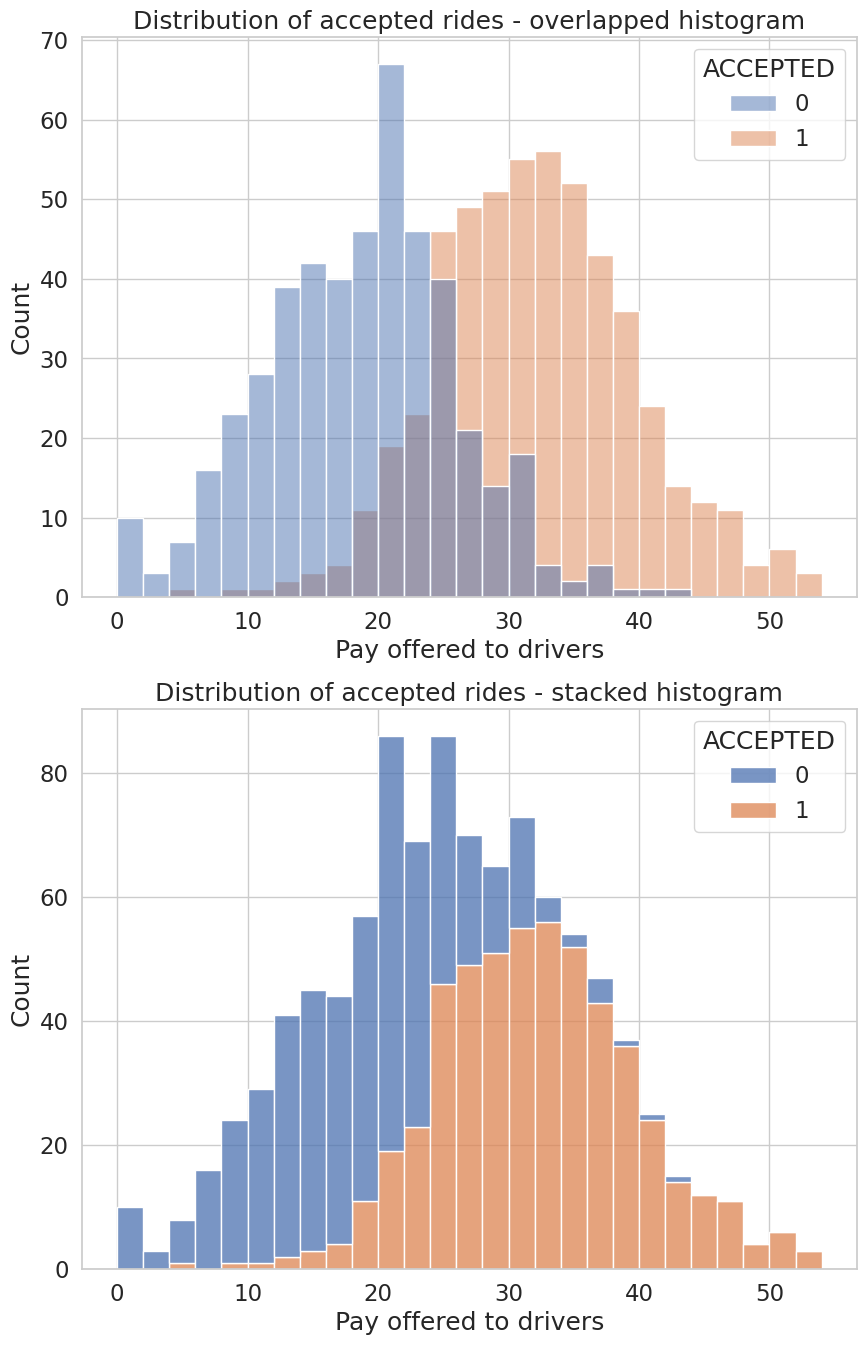

In [5]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(10,16))

sns.histplot(data=pay_df, x = 'PAY', hue='ACCEPTED', binwidth = 2, ax=ax[0])
ax[0]. set(xlabel='Pay offered to drivers', ylabel='Count', title="Distribution of accepted rides - overlapped histogram")

sns.histplot(data=pay_df, x = 'PAY', hue='ACCEPTED', multiple='stack', binwidth = 2, ax=ax[1])
ax[1]. set(xlabel='Pay offered to drivers', ylabel='Count', title="Distribution of accepted rides - stacked histogram")

plt.show()

In [6]:
# The do useful statistics, we bin the data and find the acceptance rate 
# and other useful metrics for each bin. I arbitrarily choose to cut the 
# data in $2 bin width because it seems like the decent balance of granularity and accuracy.

# bin the data into pay ranges
pay_range = np.arange(0,56,2)
print('pay_range: ',pay_range)
pay_cut = pd.cut(pay_df['PAY'], pay_range, include_lowest=True)
pay_df['pay_range']= pay_cut 


# filter for accepted and rejected ride requests
accepted = pay_df[pay_df['ACCEPTED']==1]
rejected = pay_df[pay_df['ACCEPTED']==0]

pay_range:  [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54]


In [7]:
# with the new column pay_range, we can aggregrate the data into the pay_range bins with groupby

mean= pay_df.groupby(['pay_range']).mean()
counts = pay_df.groupby(['pay_range']).count()
revenue_df = np.round(accepted.groupby(['pay_range']).sum(), 2)

grouped_df = np.round(mean[['PAY', 'ACCEPTED']], 3)

# Do more calculations and create new columns
grouped_df['pay_range lower']= pay_range[:-1]
grouped_df['pay_range upper']= pay_range[1:]
grouped_df['pay_range center'] = (pay_range[:-1] + pay_range[1:])/2

grouped_df.rename({"PAY": "Avg Pay", "ACCEPTED": "Acceptance Rate"}, axis=1, inplace=True)

grouped_df['Revenue']= revenue_df['PAY']
grouped_df['Profit']= revenue_df['profit']
grouped_df['Accepted Rides']= revenue_df['ACCEPTED']
grouped_df['Ride Requests'] = counts['ACCEPTED']
grouped_df['Profit/Ride'] = np.round(grouped_df['Profit']/grouped_df['Accepted Rides'], 3)
grouped_df['Profit/Request'] =np.round( grouped_df['Profit']/grouped_df['Ride Requests'] ,3)
# Note that Profit/Request = Acceptance_rate * Profit/Ride


## Binned data and useful metrics

In [8]:
# here's the resulting DataFrame, not all the columns will be used
grouped_df

,Avg Pay,Acceptance Rate,pay_range lower,pay_range upper,pay_range center,Revenue,Profit,Accepted Rides,Ride Requests,Profit/Ride,Profit/Request
pay_range,,,,,,,,,,,
"(-0.001, 2.0]",0.268,0.000,0,2,1.0,0.00,0.00,0,10,NaN,0.000
"(2.0, 4.0]",3.579,0.000,2,4,3.0,0.00,0.00,0,3,NaN,0.000
"(4.0, 6.0]",4.971,0.125,4,6,5.0,5.40,24.60,1,8,24.600,3.075
"(6.0, 8.0]",6.935,0.000,6,8,7.0,0.00,0.00,0,16,NaN,0.000
"(8.0, 10.0]",9.077,0.042,8,10,9.0,9.00,21.00,1,24,21.000,0.875
"(10.0, 12.0]",11.026,0.034,10,12,11.0,11.59,18.41,1,29,18.410,0.635
"(12.0, 14.0]",13.085,0.049,12,14,13.0,25.21,34.79,2,41,17.395,0.849
"(14.0, 16.0]",14.979,0.067,14,16,15.0,45.78,44.22,3,45,14.740,0.983
"(16.0, 18.0]",16.864,0.091,16,18,17.0,67.75,52.25,4,44,13.062,1.188


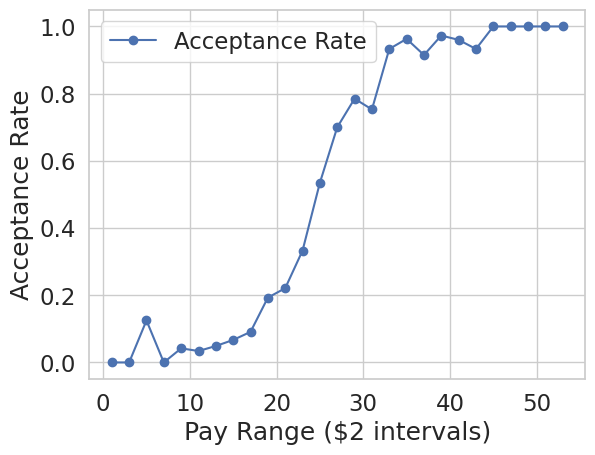

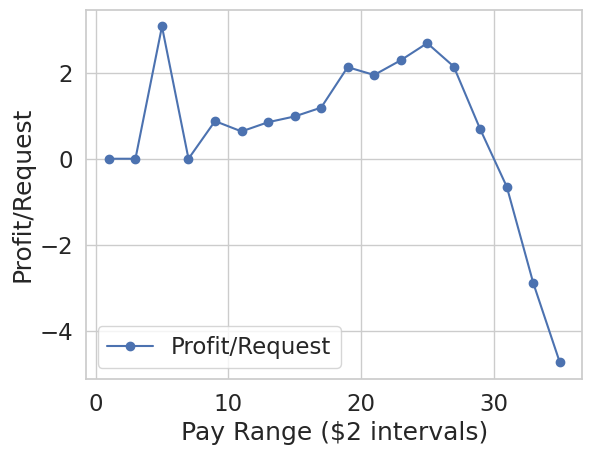

In [9]:
grouped_df.plot(y='Acceptance Rate', x='pay_range center', 
                marker='o', xlabel='Pay Range ($2 intervals)', ylabel= 'Acceptance Rate')
plt.grid(True)

grouped_df[:18].plot(y='Profit/Request', x='pay_range center', 
                marker='o', xlabel='Pay Range ($2 intervals)', ylabel= 'Profit/Request')
plt.grid(True)

## Modelling acceptance rate

Upon first glance, the acceptance rate vs pay range plot looks like a sigmoid function. I naively fit the data into a sigmoid function and get the best fit parameters. This will serve as a model that takes in driver pay as input and outputs the acceptance rate.

[-24.84534428   0.27059866]
[5.27855931e-03 9.12374675e-08]


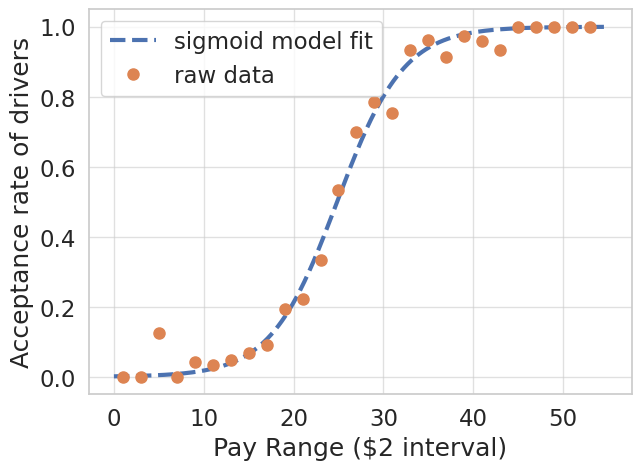

In [10]:
# extracting raw data from grouped_df
from scipy.optimize import curve_fit

x, y = grouped_df['pay_range center'].to_numpy(), grouped_df['Acceptance Rate'].to_numpy()

def sigmoid(x, x0=-24.85, x_scale=0.27):
    return 1.0/(1.0+np.exp(-(x + x0)*x_scale) )

x_s = np.arange(0,55,0.1)
y_s = sigmoid(x_s, -25,  0.25)

popt, pcov = curve_fit(sigmoid, x, y, p0=(-25.0, 0.25))

print(popt)
print(np.diag(pcov)**2)

x_s = np.arange(0,55,0.1)
y_s = sigmoid(x_s, popt[0], popt[1])

fig, ax = plt.subplots(figsize=(7,5))

plt.plot(x_s, y_s, '--', label='sigmoid model fit', lw=3)  # fit model
plt.plot(x,y, 'o', label='raw data', ms=8, lw=1)  # raw data
plt.xlabel('Pay Range ($2 interval)')
plt.ylabel('Acceptance rate of drivers')
plt.legend()
plt.grid(True, alpha = 0.6)
plt.show()

## Modelling profit/request

Here I model the profit/request metric in a similar manner. I use a generic polynomial fit the the 10th degree, since there is no obvious function that fits the curve.

[-1.88999784e-10  4.82348436e-08 -5.45608734e-06  3.59796495e-04
 -1.52994489e-02  4.37816352e-01 -8.52913179e+00  1.11572729e+02
 -9.37021477e+02  4.55813701e+03 -9.74510262e+03]


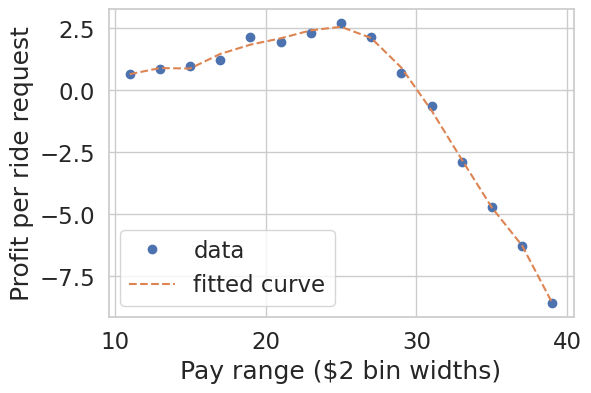

In [11]:
xf, yf = grouped_df['pay_range center'].to_numpy(), grouped_df['Profit/Request'].to_numpy()

x = xf[5:20]
y = yf[5:20]

z = np.polyfit(x,y,10)
print(z)
profit_pay_model = np.poly1d(z)

fig, ax = plt.subplots(figsize=(6,4))

n_end = 18
plt.plot(x,y, 'o', label='data')
plt.plot(x, profit_pay_model(x), '--', label='fitted curve')
plt.ylabel('Profit per ride request')
plt.xlabel('Pay range ($2 bin widths)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# FINAL MODEL

# copy and pasted from the line above
def acceptance_rate_model(x, x0=-24.85, x_scale=0.27):
    return 1.0/(1.0+np.exp(-(x + x0)*x_scale) )

pay = 25 # input pay for drivers

print('Profit/Request:' , profit_pay_model(pay))
print('Acceptance Rate:', acceptance_rate_model(25))

Profit/Request: 2.544164592256493
Acceptance Rate: 0.5101236162660289


# Simulate rider requests with Poisson statistics

## Building the Monte-Carlo simulation with scipy.stats library

In [13]:
from scipy.stats import poisson
from scipy.stats import norm

[6 2 5 6 5]


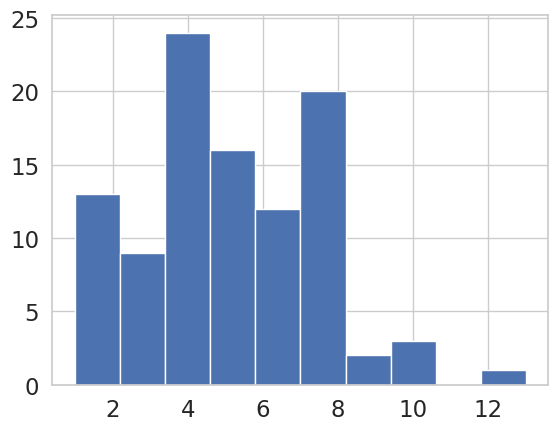

[  0  11 101]


In [14]:
# Playing with poisson.rvs, random number generator based on the poisson distribution

random_poisson = poisson.rvs(mu=5, size=100)

print(random_poisson[:5])

fig, ax = plt.subplots(1,1)
ax.hist(random_poisson)
plt.show()

print(poisson.rvs(mu=[1,10,100], size=3))

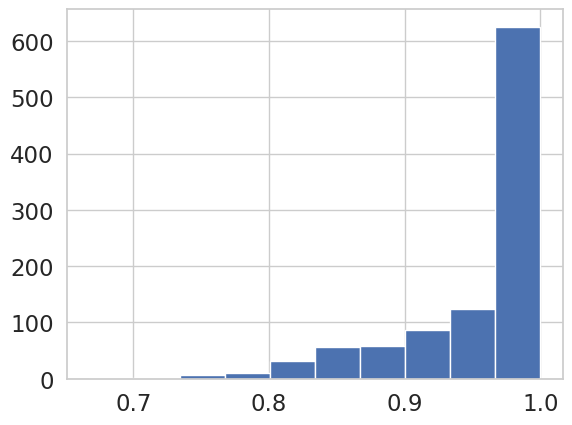

In [15]:
# capped_norm function creates a normal distrubtion with in the bounds [0,1]
# this is for simulating the acceptance rate that is used later

def capped_norm(mu = 0.25, size = 1000):
    random_norm = norm.rvs(mu, scale=0.1, size=size)
    capped = np.zeros(len(random_norm))
    for i, r in enumerate(random_norm):
        if r > 1:
            capped[i] = 1
        elif r < 0:
            capped[i] = 0
        else:
            capped[i] = r
            
    return capped
               
fig, ax = plt.subplots()
ax.hist(capped_norm(1, 1000))
plt.show()

### simulate_riders_array()

In [16]:

def simulate_riders_array(n_riders=1000, init_mu=1, n_months=12, acceptance_rate=np.ones(12)*1.0, random_seed=None):
    '''
    This function simulates rider behaviour based using a random number generators 
    based on the poisson distribution. Each step (month) of the simulation depends on 
    the ride numbers of the previous step. 
    
    n_riders:        number of riders to simulate, each rider is a row in the output array
    init_mu:         the lambda parameter for the initial poisson distribution
    n_months:        number of iterations, each iteration is a column in the output array
    acceptance_rate: 
    random_seed:     random_state parameter for the poisson.rvs
    '''
    
    rider_array = np.zeros((n_riders, n_months)) # initializing array
    initial_requests = poisson.rvs(mu=np.ones(n_riders)*init_mu, size=n_riders, random_state=random_seed)
#     initial_matches = (np.rint(initial_requests * acceptance_rate[0])).astype(int)
    initial_matches = np.rint(initial_requests * capped_norm(acceptance_rate[0], n_riders))
    rider_array[:,0] = initial_matches
    
    for m in range(n_months)[1:n_months]:
        requests = poisson.rvs(mu = rider_array[:,m-1], size=n_riders, random_state=random_seed)
        matches = requests * capped_norm(acceptance_rate[m], n_riders)
#         rider_array[:,m] = matches
        rider_array[:,m] = np.rint(matches)
    
    return (np.rint(rider_array)).astype(int)


In [17]:
# testing the simulation

driverpay = np.array([30,30,30,30,30,28,28,28,25,25,25,25])
AR = sigmoid(driverpay)
rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*1.0)

# print(rides_sim[:20,:])

df_rides = pd.DataFrame(rides_sim)
total_rides = df_rides.sum()
first_month = df_rides[0]


print(total_rides.values)
riderpay = 35
profit = total_rides.values*(riderpay-driverpay)
print(profit)
print(profit.sum())

driverpay = np.array([35,35,35,32,30,28,28,28])
print(sigmoid(driverpay))
print(type(sigmoid(driverpay)))

[1031  981  987  896  887  852  846  824  798  729  712  744]
[5155 4905 4935 4480 4435 5964 5922 5768 7980 7290 7120 7440]
71394
[0.93937458 0.93937458 0.93937458 0.87330475 0.80067205 0.70067202
 0.70067202 0.70067202]
<class 'numpy.ndarray'>


### random walk representation

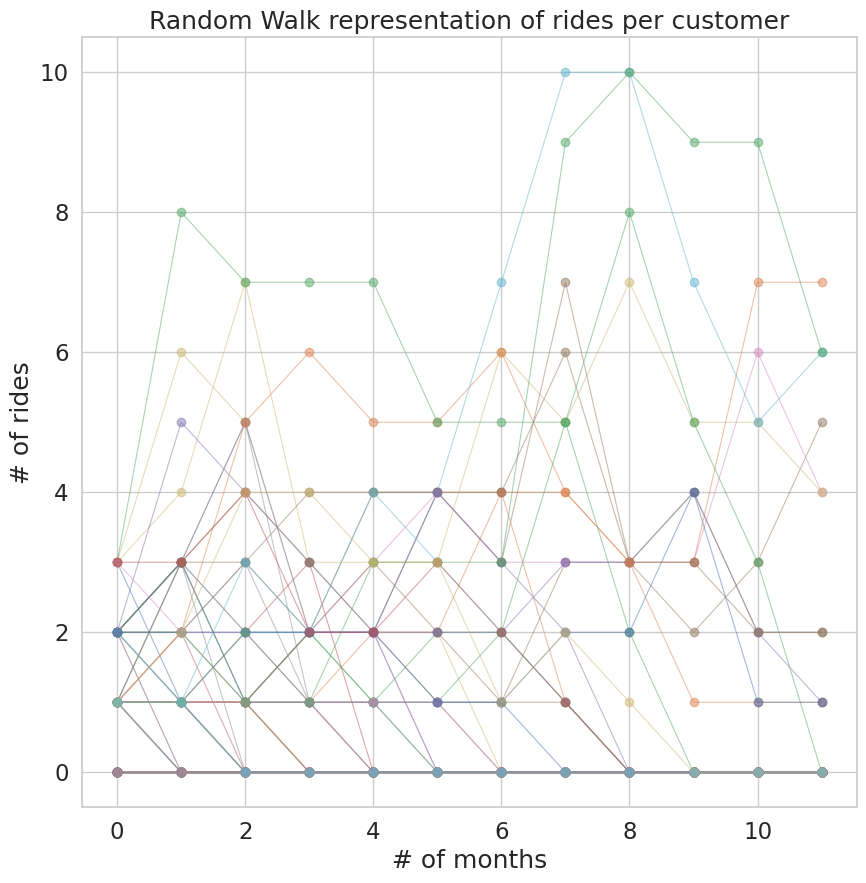

In [20]:
# Plotting the random walk, not very useful TBH

rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*0.9)

fig, ax = plt.subplots(figsize=(10,10))

for rs in rides_sim[:100]:
    plt.plot(rs, linewidth=0.8, marker='o',alpha=0.5)
plt.ylabel('# of rides')
plt.xlabel('# of months')  
plt.title('Random Walk representation of rides per customer')
plt.show()

In [21]:
# Creating the ride_stats DataFrame and storing it as csv

ride_stats = pd.DataFrame(index=np.arange(5))
# print(ride_stats)
for i in np.arange(0,12):
#     print(i)
    ride_stats = pd.merge(ride_stats, df_rides[i].value_counts(sort=False), how='outer', left_index=True, right_index=True)
    

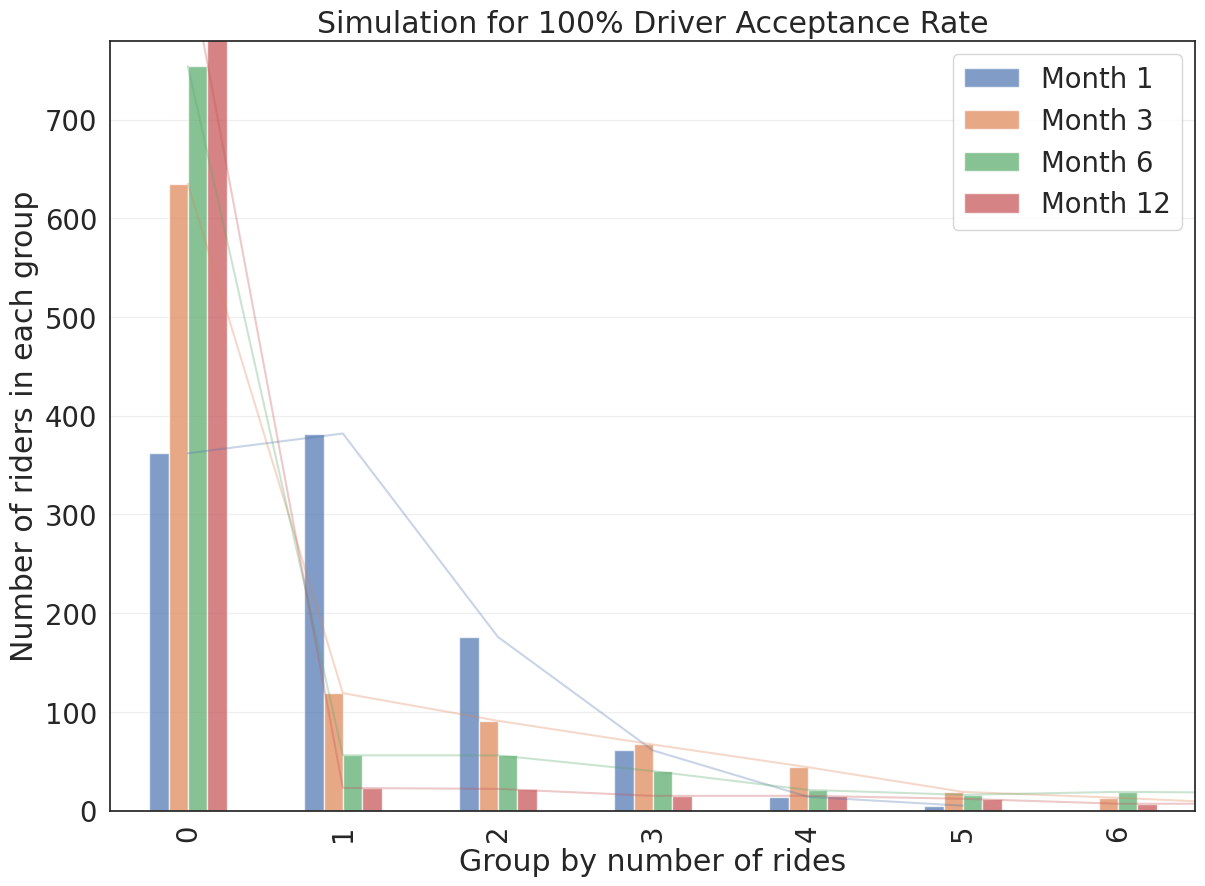

In [22]:
sns.set(font_scale=1.8)
sns.set_style("white")

# Plotting 100% AR

ride_stats = pd.read_csv('datasets/ride_stats_AR100.csv',index_col=0)
# print(ride_stats)

fig, ax = plt.subplots(figsize=(14,10))

ride_stats = ride_stats[['0','2','5','11']]
ride_stats.rename(columns={'0':'Month 1', '2':'Month 3', '5':'Month 6', '11':'Month 12'}, inplace=True)

ride_stats.plot.line(alpha=0.3, ax=ax, legend=False)
ride_stats.plot.bar(alpha=0.7, ax=ax, 
                    xlabel='Group by number of rides', 
                    ylabel='Number of riders in each group',
                    title='Simulation for 100% Driver Acceptance Rate',  legend=True)

ax.set_xlim([-0.5, 6.5])
ax.set_ylim([0,780])
plt.grid(True, axis='y', alpha=0.3)
plt.show()

       0    1    2      3      4      5      6      7      8      9     10  \
0  545.0  785  898  947.0  969.0  991.0  995.0  997.0  998.0  999.0  999.0   
1  408.0  179   85   46.0   27.0    8.0    2.0    1.0    1.0    1.0    1.0   
2   45.0   32   13    6.0    4.0    1.0    3.0    2.0    1.0    NaN    NaN   
3    2.0    3    3    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    1    1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      11  
0  999.0  
1    1.0  
2    NaN  
3    NaN  
4    NaN  


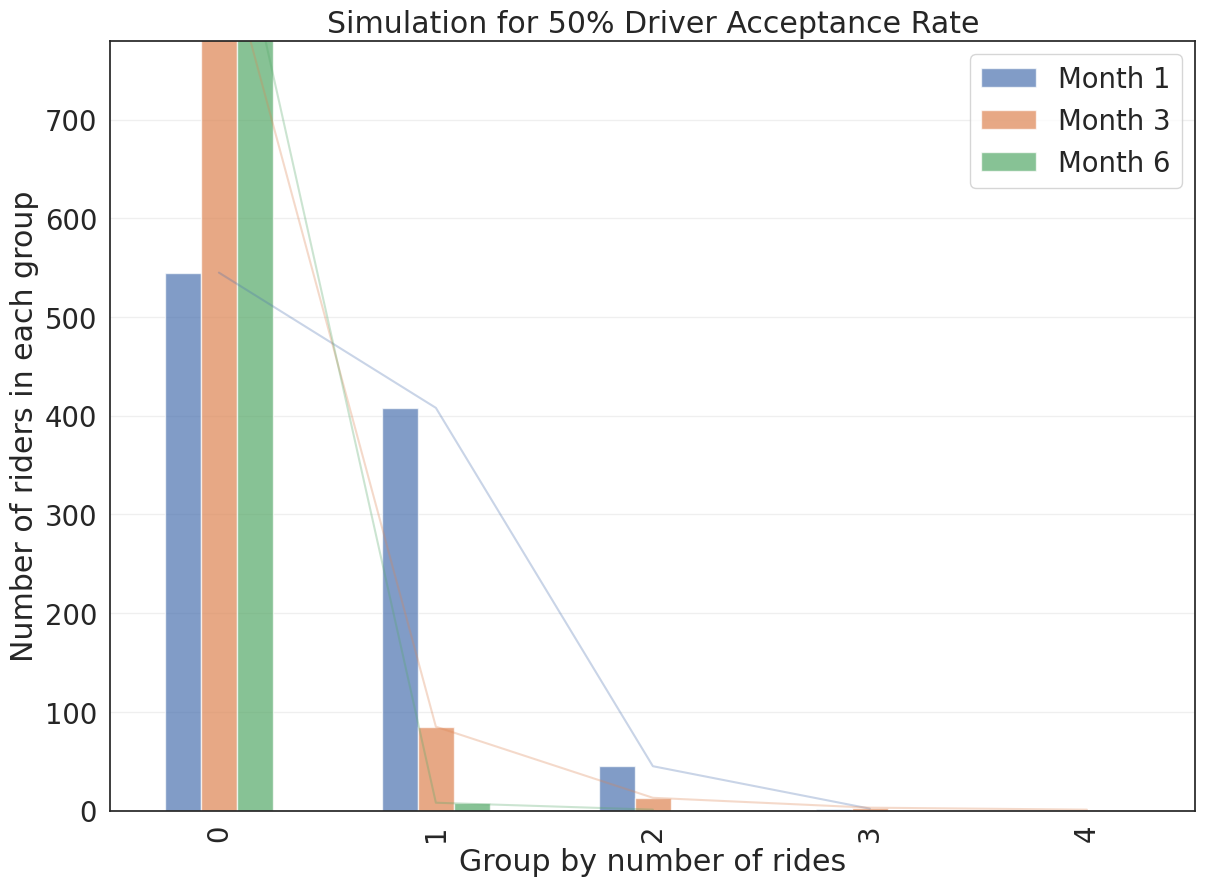

In [23]:
# Plotting 50% AR
ride_stats = pd.read_csv('datasets/ride_stats_AR50.csv',index_col=0)
print(ride_stats)
fig, ax = plt.subplots(figsize=(14,10))

ride_stats = ride_stats[['0','2','5']]
ride_stats.rename(columns={'0':'Month 1', '2':'Month 3', '5':'Month 6', '11':'Month 12'}, inplace=True)

ride_stats.plot.line(alpha=0.3, ax=ax, legend=False)
ride_stats.plot.bar(alpha=0.7, ax=ax, 
                    xlabel='Group by number of rides', 
                    ylabel='Number of riders in each group', 
                    title='Simulation for 50% Driver Acceptance Rate' ,legend=True)

ax.set_xlim([-0.5, 4.5])
ax.set_ylim([0,780])
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In [24]:
# Showing the inconsistencies of the poisson.rvs random number generator

df_summed_rides = pd.DataFrame()
cols = ['simulation_1', 'simulation_2', 'simulation_3', 'simulation_4', 'simulation_5']
for col in cols:
    rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*1.0)
    df_summed_rides[col]= np.sum(rides_sim, axis=0) 

df_summed_rides.T

,0,1,2,3,4,5,6,7,8,9,10,11
simulation_1,981,933,945,912,903,863,856,855,857,884,862,811
simulation_2,1006,955,965,949,932,835,828,794,817,805,774,744
simulation_3,999,1012,963,957,899,877,898,859,826,796,740,733
simulation_4,966,958,937,934,927,872,848,803,811,812,815,772
simulation_5,1032,1001,986,916,904,839,806,783,796,772,728,692


## Total rides per month vs Acceptance Rate (AR)

In [25]:
df_summed_rides = pd.DataFrame(index=list(range(12))) # initialize empty DF
cols = ['100% AR', '90% AR', '75% AR', '50% AR'] # columns of DF
AR = [1.0, 0.90, 0.75, 0.5]  # acceptance rates
simulation_runs=10

for i in range(4):
    rides_sim = np.zeros((1000, 12))
    for s in range(simulation_runs):
        
        rides_sim += simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*AR[i])
        
    avg_rides_sim = rides_sim/float(simulation_runs)
    df_summed_rides[cols[i]]= np.sum(avg_rides_sim, axis=0) 

df_summed_rides_T = df_summed_rides.T
df_summed_rides_T['12-month total'] = df_summed_rides_T.sum(axis=1)
df_summed_rides_T

,0,1,2,3,4,5,6,7,8,9,10,11,12-month total
100% AR,1000.1,980.2,948.5,940.5,905.2,868.3,849.6,818.3,772.0,754.3,721.7,703.1,10261.8
90% AR,977.4,932.7,875.8,807.9,746.1,685.7,627.4,577.6,530.2,483.7,440.6,401.8,8086.9
75% AR,836.2,666.6,538.0,422.6,327.8,264.5,218.9,174.3,141.1,112.8,84.8,63.0,3850.6
50% AR,505.4,254.2,130.1,66.2,34.5,17.1,8.7,4.3,2.3,0.9,0.6,0.2,1024.5


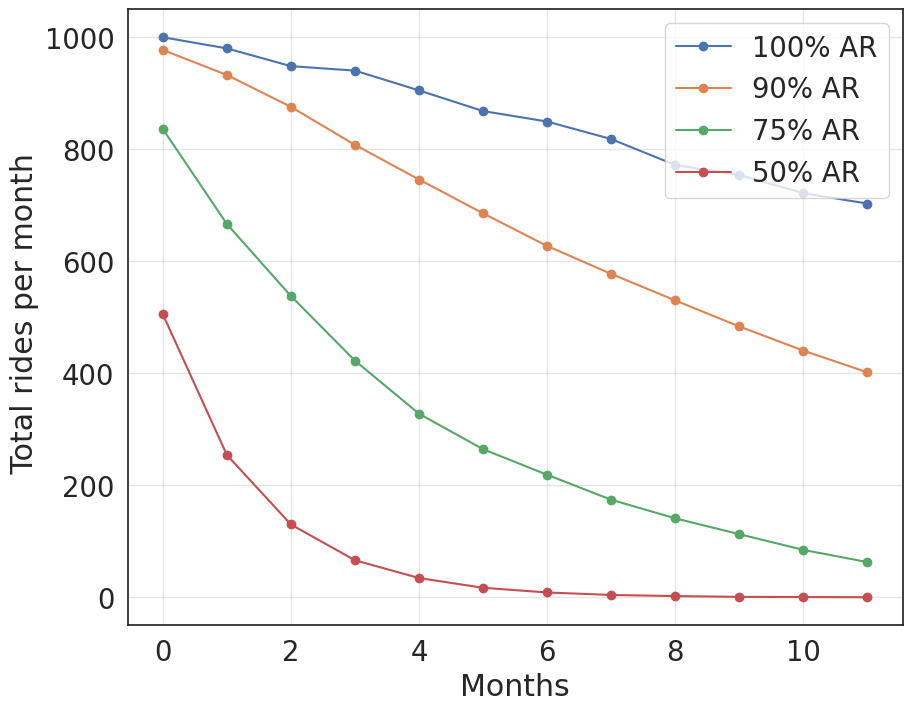

In [26]:
fig, ax = plt.subplots(figsize=(10,8))

df_summed_rides.plot(ax=ax, marker='o')
ax.set(xlabel= 'Months', ylabel=' Total rides per month')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [27]:
df_summed_rides = pd.DataFrame(index=list(range(12))) # initialize empty DF
cols = ['100%', '90%', '80%', '70%', '60%', '50%', '40%', '30%'] # columns of DF
AR = [1.0, 0.90, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]  # acceptance rates
simulation_runs=10

for i in range(len(AR)):
    rides_sim = np.zeros((1000, 12))
    for s in range(simulation_runs):
        
        rides_sim += simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*AR[i])
        
    avg_rides_sim = rides_sim/float(simulation_runs)
    df_summed_rides[cols[i]]= np.sum(avg_rides_sim, axis=0) 

In [28]:
df_summed_rides_T = df_summed_rides.T
df_summed_rides_T['12-month total'] = df_summed_rides_T.sum(axis=1)
df_summed_rides_T['12-month total']

100%    10390.9
90%      7709.4
80%      4789.5
70%      2933.4
60%      1908.9
50%      1004.7
40%       507.2
30%       270.3
Name: 12-month total, dtype: float64

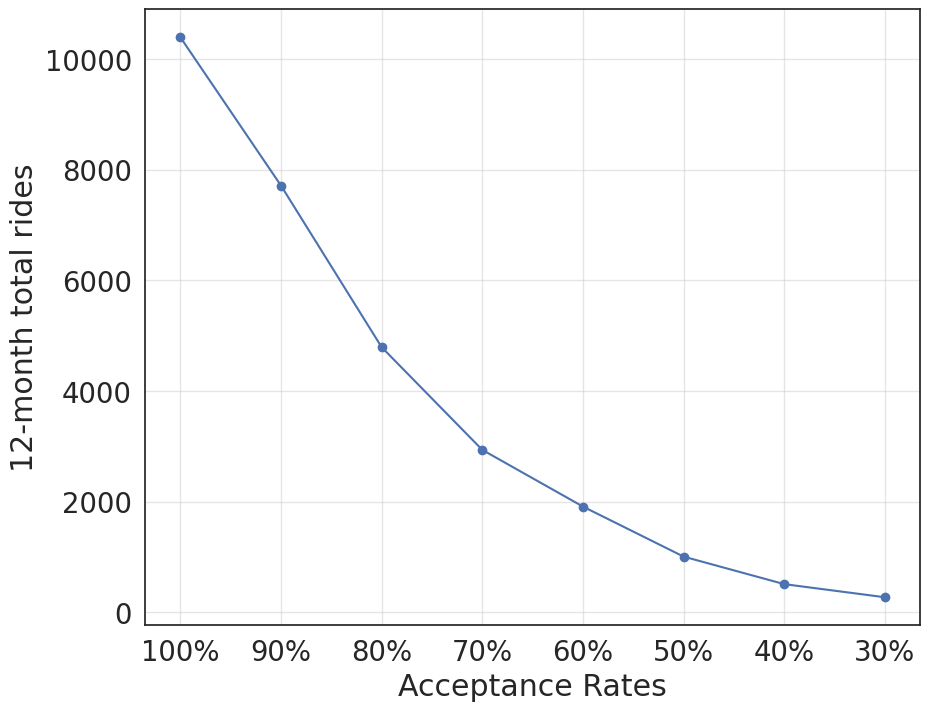

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

df_summed_rides_T['12-month total'].plot(ax=ax, marker='o')
ax.set(xlabel= 'Acceptance Rates', ylabel='12-month total rides')
plt.grid(True, alpha=0.5)
# plt.legend(loc='upper right')
plt.show()

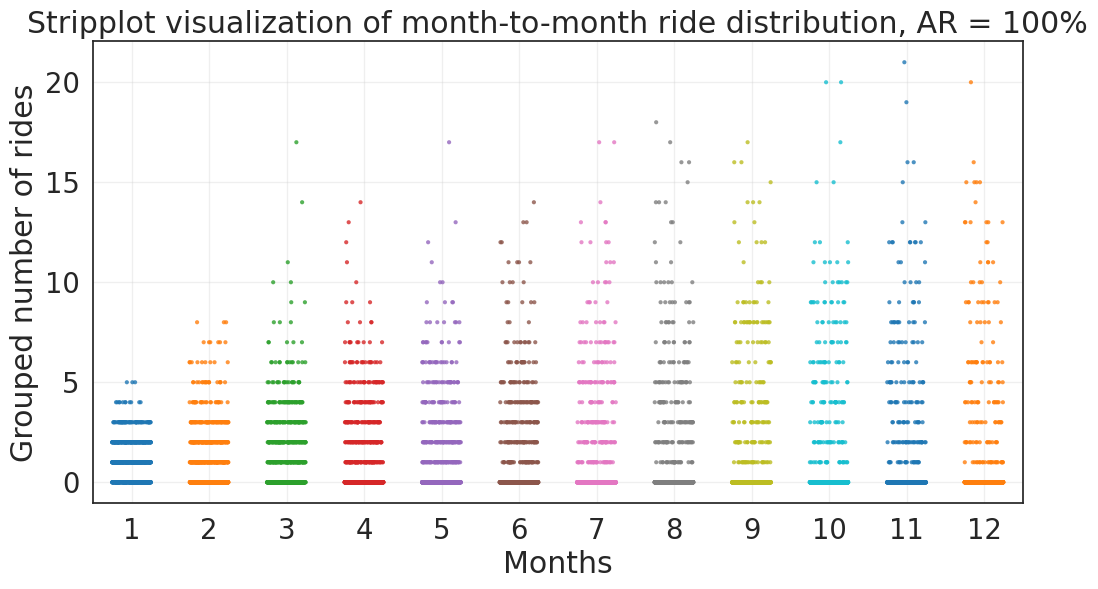

In [30]:
# Stripplot visualization of month-to-month ride distribution
AR = 1

rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*AR)
# print(rides_df[[0,2,5,11]])
rides_df=pd.DataFrame(rides_sim, columns=list(range(1,13)))
df = rides_df[list(range(1,13))]

fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(data=df, size=3, alpha=0.8, palette = 'tab10', jitter=0.25 , edgecolor='gray', orient='v', ax=ax)
ax.grid(True, axis='both', which='both', alpha =0.3)
ax.set(xlabel='Months', ylabel='Grouped number of rides', 
       title='Stripplot visualization of month-to-month ride distribution, AR = {}%'.format(AR*100))
plt.show()

In [31]:
a=32
print(type(a))
b = float(a)
print(type(b))

<class 'int'>
<class 'float'>


In [32]:
def simulate_monthly_earnings(n_riders=1000, 
                              simulation_runs=100,
                              n_months=12, 
                              init_mu=1,
                              driver_pay=np.ones(12)*25, 
                              rider_pay=30.0, 
                              verbose=False, 
                              random_seed=None):
    
    '''
    Using our simulate_riders_array() function, we can calculate the monthly earnings for the company.
    
    Args:
        n_riders (int): initial number of riders
        simulation_runs (int): number of times to run simulate_riders_array
        n_months (int): number of months (steps) to simulate
        driver_pay (ndarray): array should have n_months elements, which determines acceptance rate 
                            based on the predetermined model
        rider_pay (int): 30 by default, but it can be changed
        random_seed (int): None
        verbose (boolean): If True, prints monthly driver pay and corresponding acceptance rate
    
    Returns:
        avg_rides_df (pd.DataFrame): DataFrame of the simulated rides averaged over number of simulation_runs
        monthly_total_rides (pd.Series): Total rides of every month
        monthly_earnings (np.ndarray): monthly_total_rides * (rider_pay - driver_pay)
    '''
    
    # acceptance_rate_model() is predefined earlier
    AR = acceptance_rate_model(driver_pay)

    rides_array = np.zeros((n_riders, n_months))

    # We can run the simulation more than once and average the results for better statistical convergence
    for _ in range(simulation_runs):
        rides_array += simulate_riders_array(n_riders=n_riders, 
                                             n_months=n_months, 
                                             init_mu=init_mu, 
                                             acceptance_rate=AR, 
                                             random_seed=random_seed)
        
    # divide by number of simulations to get an average, then load it into a DF
    avg_rides_df = pd.DataFrame(rides_array/float(simulation_runs))  # avg_rides_df has continuous values instead of integers
    
    monthly_total_rides = avg_rides_df.sum().values  # sums over each month column
    monthly_earnings = monthly_total_rides *(rider_pay - driver_pay) 
    monthly_df = pd.DataFrame({'Driver Pay': driver_pay,
                               'AR': np.round(AR,2),
                                'Monthly Rides':monthly_total_rides, 
                               'Monthly Earnings': monthly_earnings })
    
    monthly_df['Month Index'] = list(range(1,n_months+1))
    monthly_df.set_index('Month Index', inplace=True)
    
    # prints some useful
    if verbose:
        print('Monthly driver pay:')
        print(np.round(driver_pay,2))
        print('Monthly acceptance rate:')
        print(np.round(AR,2))
    
    return avg_rides_df, monthly_df
    

In [33]:
# testing the simulate_monthly_earnings function
testing=True

if testing:
    sim_months = 12  # number of months to simulate
    rider_pay = 30.0
    driver_pay=np.linspace(30, 19, sim_months)
#     driver_pay = np.ones(sim_months)*25
    print(driver_pay)
    print(len(driver_pay))
    all_rides = []
    all_earnings = []
    
    empty_df = pd.DataFrame()
    for _ in range(1):

        avg_rides_df, monthly_df = simulate_monthly_earnings(n_riders=1000,
                                                            n_months=sim_months,
                                                            rider_pay=rider_pay, 
                                                            driver_pay=driver_pay, 
                                                            simulation_runs=100)
                                                        
        monthly_df = np.round(monthly_df,2)
        
        print(monthly_df)
        
        total_df = monthly_df.sum()
        print(total_df)
#         print('Total rides ({} months):'.format(sim_months), total_rides)
#         print('Total earnings ({} months):'.format(sim_months), np.round(total_earnings))
        all_rides.append(total_df['Monthly Rides'])
        all_earnings.append(total_df['Monthly Earnings'])
        empty_df += monthly_df

        
#     print(empty_df)
    print('Avg total rides {} +/- {}'.format(np.mean(all_rides), np.std(all_rides)) )
    print('Avg total earnings {} +/- {}'.format(np.mean(all_earnings), np.std(all_earnings)) )
    print('Earnings/ride {}'.format(np.mean(all_earnings)/np.mean(all_rides)))


[30. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19.]
12
             Driver Pay    AR  Monthly Rides  Monthly Earnings
Month Index                                                   
1                  30.0  0.80         888.95              0.00
2                  29.0  0.75         715.71            715.71
3                  28.0  0.70         532.00           1064.00
4                  27.0  0.64         361.11           1083.33
5                  26.0  0.58         220.48            881.92
6                  25.0  0.51         113.74            568.70
7                  24.0  0.44          47.76            286.56
8                  23.0  0.38          15.53            108.71
9                  22.0  0.32           3.70             29.60
10                 21.0  0.26           0.71              6.39
11                 20.0  0.21           0.10              1.00
12                 19.0  0.17           0.00              0.00
Driver Pay           294.00
AR                     5.76
Monthly R

In [34]:
monthly_df

,Driver Pay,AR,Monthly Rides,Monthly Earnings
Month Index,,,,
1,30.0,0.80,888.95,0.00
2,29.0,0.75,715.71,715.71
3,28.0,0.70,532.00,1064.00
4,27.0,0.64,361.11,1083.33
5,26.0,0.58,220.48,881.92
6,25.0,0.51,113.74,568.70
7,24.0,0.44,47.76,286.56
8,23.0,0.38,15.53,108.71
9,22.0,0.32,3.70,29.60


In [35]:
monthly_df[['Monthly Rides', 'Monthly Earnings']].sum()

Monthly Rides       2899.79
Monthly Earnings    4745.92
dtype: float64

## Maximizing earnings

In [36]:
def earnings_optimizer(driver_pay, rider_pay=30.0, simulation_runs=100, verbose=False):
    '''
    Args:
        driver_pay (ndarray)
        rider_pay (int or ndarray)
        simulation_runs (int)
        verbose (boolean)
        
    Returns:
        np.mean(all_rides): a single number that is the total rides, averaged over many simulations,
                            in the simulated time period of n_months
        np.mean(all_earnings): a single number that represents the total earnings for the same simulation
        
    '''
    
    sim_months = len(driver_pay)
    all_rides = []
    all_earnings = []

    for _ in range(10): 
        rides_df, monthly_df = simulate_monthly_earnings(
                                                        n_months=sim_months,
                                                        rider_pay=rider_pay, 
                                                        driver_pay=driver_pay, 
                                                        simulation_runs=simulation_runs)
        total_df = monthly_df[['Monthly Rides', 'Monthly Earnings']].sum()
        all_rides.append(total_df['Monthly Rides'])
        all_earnings.append(total_df['Monthly Earnings'])
        
        if verbose:
            print('Total rides ({} months):'.format(sim_months), total_rides)
            print('Total earnings ({} months):'.format(sim_months), np.round(total_earnings))

    if verbose:
        print('Driver pay: {}'.format(driver_pay))
        print('{} months'.format(sim_months))
        print('Avg total rides {} +/- {}'.format(np.mean(all_rides), np.std(all_rides)) )
        print('Avg total earnings {} +/- {}'.format(np.mean(all_earnings), np.std(all_earnings)) )
        print('Earnings/ride {}'.format(np.mean(all_earnings)/np.mean(all_rides)))
    
    return np.mean(all_rides), np.mean(all_earnings)

In [37]:
# Running the simulation
run=False
if run:

    n_months=24

    pay=[]
    rides=[]
    earnings=[]
    driver_pay = np.concatenate([np.arange(15,24,3), np.arange(24,26,0.2), np.arange(26,28,0.2), np.arange(28,31,2)])

    print('Driver Pay($), # of Rides, Total Earnings($)')
    for i, d in enumerate(driver_pay):
        
        avg_rides, avg_earnings = earnings_optimizer(np.ones(n_months)*d, rider_pay=30, simulation_runs=50)
        pay.append(d)
        rides.append(avg_rides)
        earnings.append(avg_earnings)
        
        print(np.round(pay[i], 2), np.round(rides[i], 2), np.round(earnings[i], 2))

In [38]:
total_df = pd.DataFrame({'Fixed Driver Pay':pay, f'{n_months}-M Total Rides':rides, f'{n_months}-M Total Earnings':earnings })
# total_df

NameError: name 'n_months' is not defined

In [ ]:
# total_df.to_csv('earnings_max_24M.csv')

In [ ]:
df1 = pd.read_csv('datasets/earnings_max_1M.csv', usecols=[1,2,3])
df3 = pd.read_csv('datasets/earnings_max_3M.csv', usecols=[1,2,3])
df6 = pd.read_csv('datasets/earnings_max_6M.csv', usecols=[1,2,3])
df12 = pd.read_csv('datasets/earnings_max_12M.csv', usecols=[1,2,3])
df24 = pd.read_csv('datasets/earnings_max_24M.csv', usecols=[1,2,3])

In [ ]:
# plt.clf()
sns.set_style("white")
fig, ax1 = plt.subplots(figsize = (7,6))
ax2 = ax1.twinx()

data = df6
pay, rides, earnings = data.iloc[:,[0]], data.iloc[:,[1]], data.iloc[:,[2]]

arr = earnings.values # convert earnings to array
max_earnings = max(arr)  # find max value 
index_max = np.where(arr == max_earnings)[0]  # find the index for max value
pay_max = pay.iloc[index_max].values  # find the corresponding pay for max value
print('max_earnings: ', max_earnings )
print('pay_max: ', pay_max)

ax1.plot(pay, earnings, '.-', label='earnings', color = 'g')

ax1.plot(pay_max, max_earnings, marker='X', ms = 10, color = 'black')

ax2.plot(pay, rides, label='rides', color = 'r')
# ax1.annotate('max earnings: {}'.format(max_earnings[0]), (25, 7000))


ax1.set_xlabel('Driver pay per ride ($)')
ax1.set_ylabel('Total Earnings ($)')
ax2.set_ylabel('Total rides')
# ax1.set_title('{} month simulation'.format(6))

fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
ax1.grid(False, alpha=0.5)
plt.show()

In [ ]:
arr = earnings.values # convert earnings to array
maxvalue = max(arr)  # find max value 
index_max = np.where(arr == maxvalue)[0]  # find the index for max value
pay_max = pay.iloc[max_index].values  # find the corresponding pay for max value



In [ ]:
# print(pay, earnings, rides)
data_dict= {'pay':pay, 'rides': rides, 'earnings': earnings}
# print(data_dict)

In [ ]:
m12_earnings_sim = pd.DataFrame(data_dict)
m12_earnings_sim.to_csv('m12_earnings_sim.csv')
print(m12_earnings_sim)